In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import numpy as np
import requests

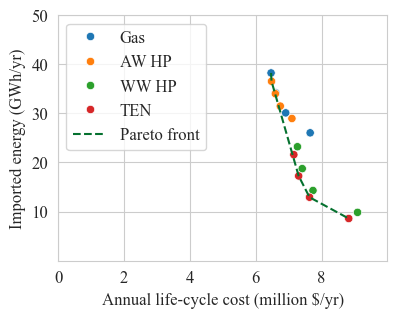

In [6]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = r'C:\drive\python\ESTCP\2_22'

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000

pareto_front = tot[tot.index.isin(['Gas - Solution 1',
                                    'AW HP - Solution 1',
                                    'TEN - Solution 2',
                                    'TEN - Solution 3',
                                    'TEN - Solution 4'])]

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario')
plt.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/yr)')
plt.ylabel('Imported energy (GWh/yr)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
plt.legend(loc='upper left')
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_import.pdf', bbox_inches='tight')
plt.show()


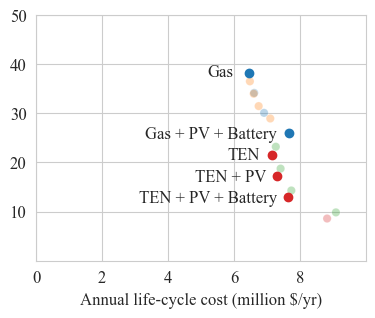

In [14]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV + Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV + Battery'}
colors_pareto = {'Gas - Solution 1':0,
                 'Gas - Solution 4':0,
                 'TEN - Solution 1':3,
                 'TEN - Solution 2':3,
                 'TEN - Solution 3':3}

tot_selec = tot[tot.index.isin(selection.keys())]

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario', alpha = 0.3)
for k in tot_selec.index:
    plt.scatter(tot_selec.loc[k, 'Annualized life-cycle cost (USD/year)'], tot_selec.loc[k, 'Imported energy (kWh/year)'], color = sns.color_palette('tab10')[colors_pareto[k]])
plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/yr)')
plt.ylabel('')
# plt.ylabel('Imported energy (GWh/yr)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
plt.gca().get_legend().set_visible(False)
plt.text(5.2, tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)'] - 0.7, 'Gas')
plt.text(3.3, tot.loc['Gas - Solution 4', 'Imported energy (kWh/year)'] - 1, 'Gas + PV + Battery')
plt.text(5.8, tot.loc['TEN - Solution 1', 'Imported energy (kWh/year)'] - 1, 'TEN')
plt.text(4.8, tot.loc['TEN - Solution 2', 'Imported energy (kWh/year)'] - 1, 'TEN + PV')
plt.text(3.1, tot.loc['TEN - Solution 3', 'Imported energy (kWh/year)'] - 1, 'TEN + PV + Battery')
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_choice_solutions.pdf', bbox_inches='tight')
plt.show()


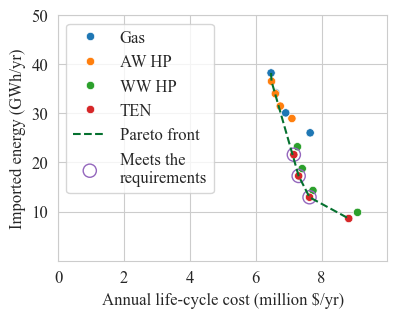

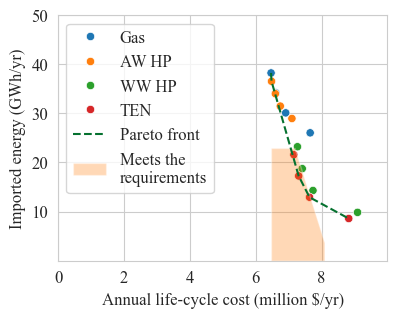

In [3]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = r'C:\drive\python\ESTCP\2_22'

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    sumt = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Life-cycle cost (USD)']]
    res = pd.concat([eimp, summ, sumt], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000
tot['Life-cycle cost (USD)'] = tot['Life-cycle cost (USD)'] / 1000000

pareto_front = tot[tot.index.isin(['Gas - Solution 1',
                                    'AW HP - Solution 1',
                                    'TEN - Solution 2',
                                    'TEN - Solution 3',
                                    'TEN - Solution 4'])]

sols_pareto = tot[tot.index.isin(['TEN - Solution 1',
                                  'TEN - Solution 2',
                                  'TEN - Solution 3'])]

baseline_import = tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)']
baseline_alcc = tot.loc['Gas - Solution 1', 'Annualized life-cycle cost (USD/year)']
baseline_lcc = tot.loc['Gas - Solution 1', 'Life-cycle cost (USD)']

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario')
plt.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
# plt.fill_between([baseline_alcc, baseline_alcc * 1.25], [baseline_import * .6, baseline_import * .6], [0,0], alpha = 0.3, label = 'Meets the\nrequirements')
plt.scatter(sols_pareto['Annualized life-cycle cost (USD/year)'], sols_pareto['Imported energy (kWh/year)'], s=90, facecolors='none', edgecolors=sns.color_palette()[4], label = 'Meets the\nrequirements')

plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/yr)')
plt.ylabel('Imported energy (GWh/yr)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
plt.legend(loc='upper left')
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_requirements_2criteria.pdf', bbox_inches='tight')
# plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_requirements_2criteria.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario')
plt.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
plt.fill_between([baseline_alcc, baseline_alcc * (1 + 0.110686689), baseline_alcc * 1.25], [baseline_import * .6, baseline_import * .6, baseline_import -21.37684516 * baseline_alcc * 0.25], [0, 0, 0], alpha = 0.3, label = 'Meets the\nrequirements')

plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/yr)')
plt.ylabel('Imported energy (GWh/yr)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
plt.legend(loc='upper left')
# plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_requirements_3criteria.pdf', bbox_inches='tight')
# plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_requirements_3criteria.png', bbox_inches='tight', dpi=300)
plt.show()

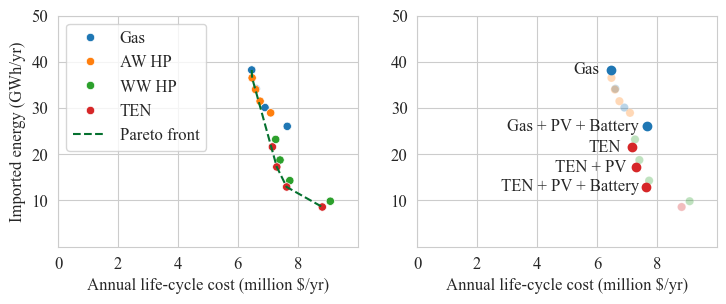

In [25]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = r'C:\drive\python\ESTCP\2_22'

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV + Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV + Battery'}
colors_pareto = {'Gas - Solution 1':0,
                 'Gas - Solution 4':0,
                 'TEN - Solution 1':3,
                 'TEN - Solution 2':3,
                 'TEN - Solution 3':3}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000

pareto_front = tot[tot.index.isin(['Gas - Solution 1',
                                    'AW HP - Solution 1',
                                    'TEN - Solution 2',
                                    'TEN - Solution 3',
                                    'TEN - Solution 4'])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 3))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario', ax = ax1)
ax1.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
ax1.set_xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
ax1.set_ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
ax1.set_xlabel('Annual life-cycle cost (million $/yr)')
ax1.set_ylabel('Imported energy (GWh/yr)')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_yticks(ax1.get_yticks()[1:])
ax1.legend(loc='upper left')

tot_selec = tot[tot.index.isin(selection.keys())]

sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario', alpha = 0.3, ax = ax2)
for k in tot_selec.index:
    ax2.scatter(tot_selec.loc[k, 'Annualized life-cycle cost (USD/year)'], tot_selec.loc[k, 'Imported energy (kWh/year)'], color = sns.color_palette('tab10')[colors_pareto[k]])
ax2.set_xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
ax2.set_ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
ax2.set_xlabel('Annual life-cycle cost (million $/yr)')
ax2.set_ylabel(None)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_yticks(ax2.get_yticks()[1:])
ax2.get_legend().set_visible(False)
ax2.text(5.2, tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)'] - 0.7, 'Gas')
ax2.text(3, tot.loc['Gas - Solution 4', 'Imported energy (kWh/year)'] - 1, 'Gas + PV + Battery')
ax2.text(5.7, tot.loc['TEN - Solution 1', 'Imported energy (kWh/year)'] - 1.1, 'TEN')
ax2.text(4.6, tot.loc['TEN - Solution 2', 'Imported energy (kWh/year)'] - 1.1, 'TEN + PV')
ax2.text(2.8, tot.loc['TEN - Solution 3', 'Imported energy (kWh/year)'] - 0.9, 'TEN + PV + Battery')
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\pareto_combi.pdf', bbox_inches='tight')
plt.show()


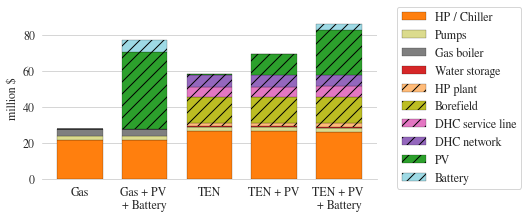

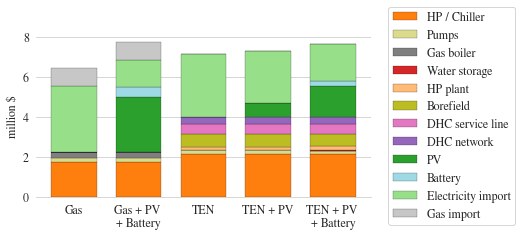

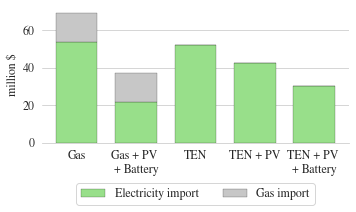

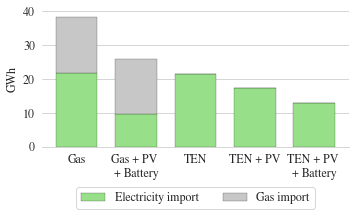

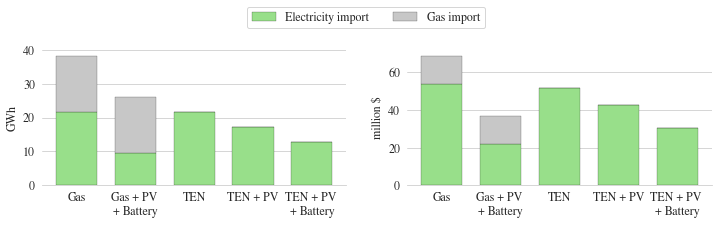

In [12]:
sns.set_style("whitegrid")
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "FreeSerif" # for ubuntu
plt.rcParams['font.size'] = 12

#folder_ini = r'C:\drive\python\ESTCP\2_22'
#files = {'Gas - Solution 1':r'futu2-gas_multi\Solution 1-futu2-gas_multi.xlsx',
#         'Gas - Solution 4':r'futu2-gas_multi\Solution 4-futu2-gas_multi.xlsx',
#         'TEN - Solution 1':r'futu2-ets_multi\Solution 1-futu2-ets_multi.xlsx',
#         'TEN - Solution 2':r'futu2-ets_multi\Solution 2-futu2-ets_multi.xlsx',
#         'TEN - Solution 3':r'futu2-ets_multi\Solution 3-futu2-ets_multi.xlsx'}

folder_ini = os.path.join(os.getcwd(), 'MILP_results', '2_22')
files = {'Gas - Solution 1':os.path.join('futu2-gas_multi', 'Solution 1-futu2-gas_multi.xlsx'),
         'Gas - Solution 4':os.path.join('futu2-gas_multi', 'Solution 4-futu2-gas_multi.xlsx'),
         'TEN - Solution 1':os.path.join('futu2-ets_multi', 'Solution 1-futu2-ets_multi.xlsx'),
         'TEN - Solution 2':os.path.join('futu2-ets_multi', 'Solution 2-futu2-ets_multi.xlsx'),
         'TEN - Solution 3':os.path.join('futu2-ets_multi', 'Solution 3-futu2-ets_multi.xlsx')}
folder_output = os.path.join(os.getcwd(), 'img_milp_results')
os.makedirs(folder_output, exist_ok=True)

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV \n+ Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV \n+ Battery'}

res = pd.DataFrame()
for f in files:
    lect = pd.read_excel(os.path.join(folder_ini, files[f]), sheet_name='Cost & CO2')
    lect['Solution'] = selection[f]
    res = pd.concat([res, lect])

res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import', 'Export'])]
res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import'])]


replace_names = {'A2W HP':'HP / Chiller', 
                 'ETS HP':'HP / Chiller', 
                 'local W2WHP': 'HP / Chiller',
                 'chiller': 'HP / Chiller',
                 'Gas Boiler (Linearized cost)':'Gas boiler',
                 'Generic Borehole':'Borefield', 
                 'Generic Hot Water Storage':'Water storage', 
                 'HEX ETS':'Grid connection',
                 'HEX pump ETS':'DHC service line',
                 'Individual Borehole':'Borefield', 
                 'Main HP':'HP plant', 
                 'Pump DHW':'Pumps', 
                 'Pump DHW gas':'Pumps', 
                 'Pump SH':'Pumps', 'Pump cooling': 'Pumps', 
                 'cooling_tower': 'Cooling tower', 
                 'cooling tower a2w': 'Cooling tower',
                 'cooling tower plant': 'Cooling tower', 
                 'cooling tower w2w': 'Cooling tower',
                 'cooling tower chiller': 'Cooling tower',
                 'Anergy':'DHC network',
                 'parking to pv': 'PV',
                 'rooftop to pv': 'PV',
                 'battery': 'Battery',
                 'Electricity': 'Electricity import',
                 'Gas': 'Gas import'}

colors= {'Borefield':16, 'Cooling tower':0, 'Gas boiler':14, 
         'DHC service line':12, 'HP / Chiller':2, 'HP plant':3, 'DHC network':8, 
         'Pumps':17, 'Water storage':6, 'Electricity import':5, 'Gas import':15, 
         'PV': 4, 'Battery': 19}

rank= {'Borefield':6, 'Cooling tower':2, 'Gas boiler':3, 
         'DHC service line':7, 'HP / Chiller':0, 'HP plant':5, 'DHC network':8, 
         'Pumps':1, 'Water storage':4, 'Electricity import':11, 'Gas import':12,
         'PV': 9, 'Battery': 10}

network = ['Borefield', 'DHC service line', 'HP plant', 'DHC network', 'Battery', 'PV']

res['Name'] = res['Name'].apply(lambda x: 'Generic Hot Water Storage' if 'Generic Hot Water Storage' in x else x)
res['Name'] = res['Name'].apply(lambda x: 'Individual Borehole' if 'Individual Borehole' in x else x)
res['Name'] = res['Name'].replace(replace_names)

res_avg = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).mean(numeric_only=True)
res_max = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).max(numeric_only=True)
res = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).sum()

usd = {'Investment (USD)': 'Investment_costs', 
        'Annualized life-cycle cost (USD/year)': 'Life-cycle_cost', 
        'Imports cost (USD)': 'Import_energy_cost',
        'Energy in (kWh/year)': 'Energy_imports'}
# usd = {'Investment (USD)': 'Investment costs'}

pos_leg = {'Investment (USD)': -0.55, 
        'Annualized life-cycle cost (USD/year)': -0.55,
        'Imports cost (USD)': -0.3,
        'Energy in (kWh/year)':-0.3}

for i in usd:    
    temp = res[(res[i] > 0)]
    if i == 'Energy in (kWh/year)':
        temp = temp[(temp['Type'] == 'Import') & (temp['Name'].isin(['Electricity import', 'Gas import']))]
    piv = temp.pivot(columns=['Solution'], index = 'Name', values= i)
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    # piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1000000
    pivb = piv.cumsum()

    if i in['Investment (USD)', 'Annualized life-cycle cost (USD/year)']:
        plt.figure(figsize=(6, 3))
    else:
        plt.figure(figsize=(5.5, 2.5))
    for j, k in enumerate(piv.index):
        if j == 0:
            plt.bar(piv.columns, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        else:
            if k in network and i == 'Investment (USD)':
                plt.bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    edgecolor = 'black', linewidth=0.2, hatch='//',
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
            else:
                plt.bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                        edgecolor = 'black', linewidth=0.2, 
                        color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        old = k

    if i in['Investment (USD)', 'Annualized life-cycle cost (USD/year)']:
        plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), ncol=1)
    else:
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
    sns.despine(left=True)
    plt.gca().xaxis.grid(False)
    if i == 'Energy in (kWh/year)':
        plt.ylabel('GWh')
    else:
        plt.ylabel('million $')
    #plt.savefig(rf'C:\git\JBA-site-assessment_latex\img\milp_results\{usd[i]}.pdf', bbox_inches='tight')
    plt.savefig(os.path.join(folder_output, f'{usd[i]}.pdf'), bbox_inches='tight')
    plt.show()


# Common figure (energy import)

fig, ax = plt.subplots(1, 2, figsize=(12, 2.5))
for n, i in enumerate(['Energy in (kWh/year)', 'Imports cost (USD)']):
    temp = res[(res[i] > 0)]
    if i == 'Energy in (kWh/year)':
        temp = temp[(temp['Type'] == 'Import') & (temp['Name'].isin(['Electricity import', 'Gas import']))]
    piv = temp.pivot(columns=['Solution'], index = 'Name', values= i)
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    # piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1e6
    pivb = piv.cumsum()

    for j, k in enumerate(piv.index):
        if j == 0:
            ax[n].bar(piv.columns, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        else:
            if k in network:
                ax[n].bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    edgecolor = 'black', linewidth=0.2, hatch='//',
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
            else:
                ax[n].bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                        edgecolor = 'black', linewidth=0.2, color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        old = k

    sns.despine(left=True)
    ax[n].xaxis.grid(False)
    if i == 'Energy in (kWh/year)':
        ax[n].set_ylabel('GWh')
    else:
        ax[n].set_ylabel('million $')
handles, labels = ax[n].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
#plt.savefig(rf'C:\git\JBA-site-assessment_latex\img\milp_results\combi_energy.pdf', bbox_inches='tight')
plt.savefig(os.path.join(folder_output, 'combi_energy.pdf'), bbox_inches='tight')
plt.show()

C:\Users\remi\AppData\Local\Temp\ipykernel_36636\559650379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['label'] = temp['Solution'].apply(lambda x: x.replace('_pv', ''))


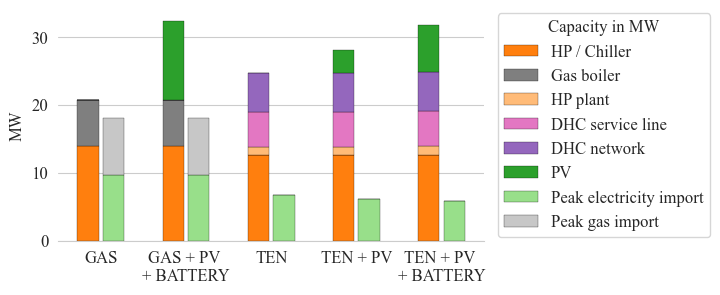

In [8]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

temp = res[(res['Capacity (kW or KWh)'] > 0) & (res['Life-cycle cost (USD)'] > 0)]
temp['label'] = temp['Solution'].apply(lambda x: x.replace('_pv', ''))
temp.loc[(temp['Name'] == 'DHC network'), 'Capacity (kW or KWh)'] = res_avg.loc[(res_avg['Name'] == 'DHC network'), 'Capacity (kW or KWh)']
source_temp = np.arange(5)

names_legend = {'HP / Chiller':'HP / Chiller', 
                 'Gas boiler':'Gas boiler',
                 'Borefield':'Borefield', 
                 'Water storage':'Water storage', 
                 'Grid connection':'Grid connection',
                 'DHC service line':'DHC service line',
                 'HP plant':'HP plant', 
                 'Pumps':'Pumps',
                 'Cooling tower': 'Cooling tower', 
                 'DHC network':'DHC network',
                 'PV': 'PV',
                 'Battery': 'Battery',
                 'Electricity import': 'Peak electricity import',
                 'Gas import': 'Peak gas import'}

choice = [['Conversion', 'Export', 'Network'], ['Import']]

width = 0.25
fig, ax1 = plt.subplots(figsize=(5.5,3))
compt = -0.15
for h, g in enumerate(choice):
    tempb = temp[temp['Type'].isin(g)]
    tempb = tempb[~tempb['Name'].isin(['Pumps'])]
    piv = tempb.pivot(columns=['Solution'], index = 'Name', values= 'Capacity (kW or KWh)')
    for missing in list(selection.values()):
        if missing not in piv.columns:
            piv[missing] = 0
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1000

    pivb = piv.cumsum()
    for j, k in enumerate(piv.index):
        if j == 0:
            ax1.bar(source_temp + compt, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    width = width, 
                    color=sns.color_palette("tab20")[colors[k]], label = names_legend[k])
        else:
            ax1.bar(source_temp + compt, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    width = width, 
                    edgecolor = 'black', linewidth=0.2, color=sns.color_palette("tab20")[colors[k]], label = names_legend[k])
        old = k
    compt = compt + 0.3
    

ax1.legend(loc='center right', bbox_to_anchor=(1.55, 0.5), title='Capacity in MW')
sns.despine(left=True)
ax1.xaxis.grid(False)
ax1.set_ylabel('MW')
plt.xticks(source_temp, piv.columns)
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\capacity_variant.pdf', bbox_inches='tight')
plt.show()

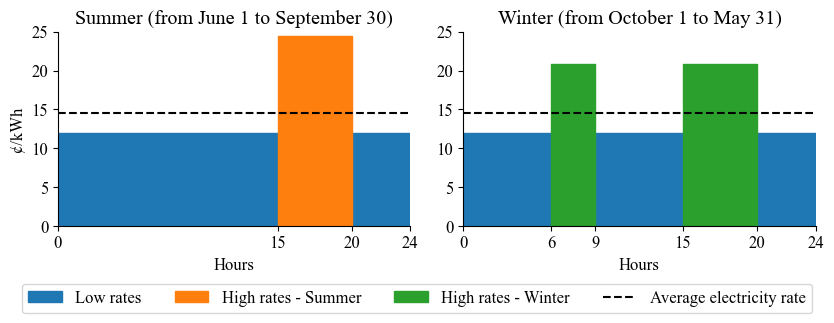

In [14]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

reference = {'Low rates': 12, 'High rates summer': 24.5, 'High rates winter': 20.9}

x = np.linspace(0, 24, 25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 3))
ax1.fill_between(x, reference['Low rates'], where= (x <= 15) | (x >= 20), color = sns.color_palette()[0], label='Low rates')
ax1.fill_between(x, reference['High rates summer'], where= (x >= 15) & (x <= 20), color = sns.color_palette()[1], label='High rates - Summer')
ax1.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color='black')
ax1.set_xlabel('Hours')
ax1.set_ylabel('¢/kWh')
ax1.margins(x = 0)
ax1.set_ylim(bottom=0, top=25)
ax1.set_xticks([0, 15, 20, 24])
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Summer (from June 1 to September 30)')

ax2.fill_between(x, reference['Low rates'], where= (x <= 9) | ((x >= 9) & (x <= 15)) | (x >= 20), color = sns.color_palette()[0])
ax2.fill_between(x, reference['High rates winter'], where= ((x >= 6) & (x <= 9)) | ((x >= 15) & (x <= 20)), color = sns.color_palette()[2], label='High rates - Winter')
ax2.plot(x, 14.6 * np.ones(len(x)), label='Average electricity rate', linestyle='dashed', color='black')
ax2.set_xlabel('Hours')
ax2.margins(x = 0)
ax2.set_ylim(bottom=0, top=25)
ax2.set_xticks([0, 6, 9, 15, 20, 24])
ax2.spines[['right', 'top']].set_visible(False)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.set_title('Winter (from October 1 to May 31)')
fig.legend(h1+h2, l1+l2, ncols=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
fig.tight_layout()
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\prices_rates.pdf', bbox_inches='tight')
plt.show()

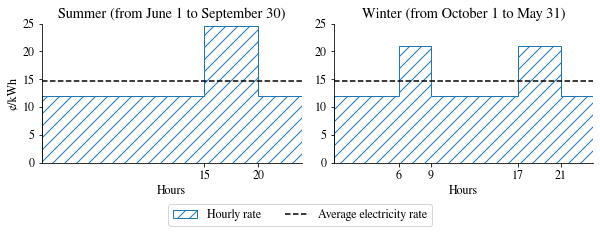

In [2]:
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "FreeSerif" # for ubuntu
plt.rcParams['font.size'] = 12

reference = {'Low rates': 12, 'High rates summer': 24.5, 'High rates winter': 20.9}

df = pd.DataFrame({'time': np.linspace(0, 23, 24)})
df['summer'] = df['time'].apply(lambda x: reference['High rates summer'] if ((x >= 15) & (x <= 19)) else reference['Low rates'])
df['winter'] = df['time'].apply(lambda x: reference['High rates winter'] if ((x >= 6) & (x <= 8)) | ((x >= 17) & (x <= 20)) else reference['Low rates'])


x = np.linspace(0, 24, 25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 3))
ax1.stairs(df['summer'], hatch='//', label = 'Hourly rate')
ax1.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color='black', label='Average electricity rate')
ax1.set_xlabel('Hours')
ax1.set_ylabel('¢/kWh')
ax1.margins(x = 0)
ax1.set_xlim(0,23.99)
ax1.set_ylim(bottom=0, top=25)
ax1.set_xticks([15, 20])
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Summer (from June 1 to September 30)')

ax2.stairs(df['winter'], hatch='//')
ax2.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color='black')
ax2.set_xlabel('Hours')
ax2.margins(x = 0)
ax2.set_ylim(bottom=0, top=25)
ax2.set_xticks([6, 9, 17, 21])
ax2.spines[['right', 'top']].set_visible(False)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.set_title('Winter (from October 1 to May 31)')
fig.legend(h1+h2, l1+l2, ncols=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
fig.tight_layout()
#plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\prices_rates_variante.pdf', bbox_inches='tight')
plt.savefig(os.path.join(os.getcwd(), 'prices_rates_variante.pdf'), bbox_inches='tight')
plt.show()

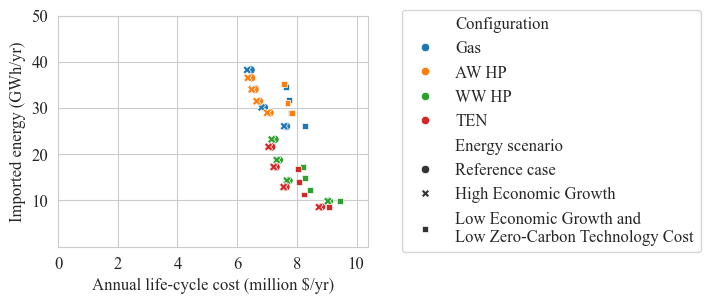

In [2]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = r'C:\drive\python\ESTCP\2_25'
names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}
rank = {'Gas': 0, 'AW HP': 1, 'WW HP': 2, 'TEN': 3}
folders = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}
variantes = {'futu2': 'Reference case', 'higheco': 'High Economic Growth', 'worst': 'Low Economic Growth and\nLow Zero-Carbon Technology Cost'}

tot = pd.DataFrame()
for f in folders:
    file = [name for name in os.listdir(os.path.join(folder_ini, f)) if 'Summary' in name][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    res['variantes'] = f.split('-')[0]
    tot = pd.concat([tot, res])
    
tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution'] + '-' + tot['variantes']
tot['variantes'] = tot['variantes'].apply(lambda x: variantes[x])
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000
tot = tot.rename(columns = {'scenario': 'Configuration', 'variantes':'Energy scenario'})
tot['rank'] = tot['Configuration'].apply(lambda x: rank[x])
tot = tot.sort_values(['Solution', 'rank'])

fig, ax = plt.subplots(figsize=(4,3))
ax = sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'Configuration', style = 'Energy scenario')
ax.set_xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
ax.set_ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
ax.set_xlabel('Annual life-cycle cost (million $/yr)')
ax.set_ylabel('Imported energy (GWh/yr)')
ax.set_yticks(plt.gca().get_yticks()[1:])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center right', bbox_to_anchor=(2.1, 0.5), ncol=1)
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\scenarios_vars.pdf', bbox_inches='tight')
plt.savefig(r'G:\Shared drives\dod-jba-lbl-team\3_meeting minutes\2025-03-11_JBA monthly\img\scenarios_vars.png', bbox_inches='tight', dpi=300)
plt.show()

In [3]:
params ={'api_key': "G5uzdasij5HylAlsWoIY4Y1i2Al5A3OFmScraZ2a"}

url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_elc_NA_enc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_esc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_mdatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_mtn_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_neengl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_pcf_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_soatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_wnc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_wsc_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
elec_reg = pd.DataFrame(response.json()['response']['data'])

url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_elc_NA_NA_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
elec_us = pd.DataFrame(response.json()['response']['data'])

elec = pd.concat([elec_reg, elec_us])
elec = elec[elec['regionName'] == 'South Atlantic']
elec['period'] = elec['period'].astype(int)
elec['value'] = elec['value'].astype(float)
elec = elec.sort_values(['period', 'value'], ascending=False).reset_index(drop=True)
elec = elec[elec['period'] >= 2022]
elec_min = elec.drop_duplicates('period', keep = 'first')
elec_max = elec.drop_duplicates('period', keep = 'last')


url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_ng_NA_enc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_esc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_mdatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_mtn_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_neengl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_pcf_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_soatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_wnc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_wsc_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
gaz_reg = pd.DataFrame(response.json()['response']['data'])

url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_ng_NA_NA_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
gaz_us = pd.DataFrame(response.json()['response']['data'])

gaz = pd.concat([gaz_reg, gaz_us])
gaz = gaz[gaz['regionName'] == 'South Atlantic']
gaz['period'] = gaz['period'].astype(int)
gaz['value'] = gaz['value'].astype(float)
gaz = gaz.sort_values(['period', 'value'], ascending=False).reset_index(drop=True)
gaz = gaz[gaz['period'] >= 2022]
gaz_min = gaz.drop_duplicates('period', keep = 'first')
gaz_max = gaz.drop_duplicates('period', keep = 'last')

Electricity: 14.597192810000001
Gas: 5.575387812400001


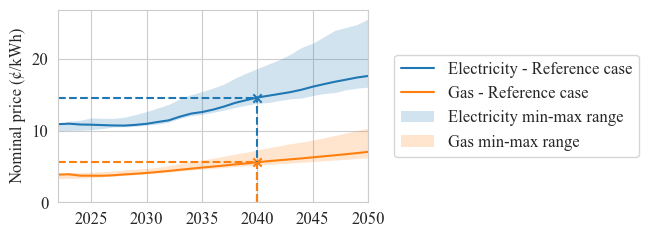

In [5]:
convert = 100 / (1 / 3412 * 1000000)

sns.set_style('whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

plt.figure(figsize=(4,2.5))
plt.plot(elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Electricity - Reference case', color = sns.color_palette()[0])
plt.plot(gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Gas - Reference case', color = sns.color_palette()[1])

plt.fill_between(elec_min['period'], elec_min['value'] * convert, elec_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[0], linewidth=0, label = 'Electricity min-max range')
plt.fill_between(gaz_min['period'], gaz_min['value'] * convert, gaz_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[1], linewidth=0, label = 'Gas min-max range')

val_40_e = elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic') & (elec['period'] == 2040)]['value'].values[0] * convert
plt.scatter(2040, val_40_e, marker = 'x', color = sns.color_palette()[0])
plt.vlines(2040, 0, val_40_e, color = sns.color_palette()[0], linestyles = 'dashed')
plt.hlines(val_40_e, 2022, 2040, color = sns.color_palette()[0], linestyles = 'dashed')
print(f'Electricity: {val_40_e}')

val_40_g = gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic') & (gaz['period'] == 2040)]['value'].values[0] * convert
plt.scatter(2040, val_40_g, marker = 'x', color = sns.color_palette()[1])
plt.vlines(2040, 0, val_40_g, color = sns.color_palette()[1], linestyles = 'dashed')
plt.hlines(val_40_g, 2022, 2040, color = sns.color_palette()[1], linestyles = 'dashed')
# plt.text(2022 - 1, val_40_g, round(val_40_g,1), ha='center', va='center')
print(f'Gas: {val_40_g}')

plt.margins(x=0)
plt.ylabel('Nominal price (¢/kWh)')
plt.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))
plt.gca().set_ylim(bottom=0)
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\elec_gas_nom.pdf', bbox_inches='tight')
plt.show()

C:\Users\remi\AppData\Local\Temp\ipykernel_27632\3318189780.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_40_e['value'] = val_40_e['value'] * convert
C:\Users\remi\AppData\Local\Temp\ipykernel_27632\3318189780.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_40_g['value'] = val_40_g['value'] * convert


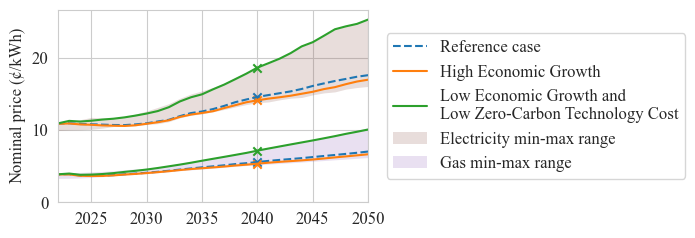

In [6]:
convert = 100 / (1 / 3412 * 1000000)

sns.set_style('whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

plt.figure(figsize=(4,2.5))

plt.plot(elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Reference case', color = sns.color_palette()[0], linestyle='dashed')
plt.plot(gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, color = sns.color_palette()[0], linestyle='dashed')

plt.plot(elec[(elec['scenario'] == 'highmacro') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'highmacro') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'High Economic Growth', color = sns.color_palette()[1])
plt.plot(gaz[(gaz['scenario'] == 'highmacro') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'highmacro') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, color = sns.color_palette()[1])

plt.plot(elec[(elec['scenario'] == 'lowmaclowZTC') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'lowmaclowZTC') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Low Economic Growth and\nLow Zero-Carbon Technology Cost', color = sns.color_palette()[2])
plt.plot(gaz[(gaz['scenario'] == 'lowmaclowZTC') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'lowmaclowZTC') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, color = sns.color_palette()[2])

plt.fill_between(elec_min['period'], elec_min['value'] * convert, elec_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[5], linewidth=0, label = 'Electricity min-max range')
plt.fill_between(gaz_min['period'], gaz_min['value'] * convert, gaz_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[4], linewidth=0, label = 'Gas min-max range')

val_40_e = elec[(elec['regionName'] == 'South Atlantic') & (elec['period'] == 2040)]
val_40_e['value'] = val_40_e['value'] * convert
plt.scatter(2040, val_40_e[val_40_e['scenario'] == 'ref2023']['value'].values[0], marker = 'x', color = sns.color_palette()[0])
plt.scatter(2040, val_40_e[val_40_e['scenario'] == 'highmacro']['value'].values[0], marker = 'x', color = sns.color_palette()[1])
plt.scatter(2040, val_40_e[val_40_e['scenario'] == 'lowmaclowZTC']['value'].values[0], marker = 'x', color = sns.color_palette()[2])

val_40_g = gaz[(gaz['regionName'] == 'South Atlantic') & (gaz['period'] == 2040)]
val_40_g['value'] = val_40_g['value'] * convert
plt.scatter(2040, val_40_g[val_40_g['scenario'] == 'ref2023']['value'].values[0], marker = 'x', color = sns.color_palette()[0])
plt.scatter(2040, val_40_g[val_40_g['scenario'] == 'highmacro']['value'].values[0], marker = 'x', color = sns.color_palette()[1])
plt.scatter(2040, val_40_g[val_40_g['scenario'] == 'lowmaclowZTC']['value'].values[0], marker = 'x', color = sns.color_palette()[2])
# plt.text(2022 - 1, val_40_g, round(val_40_g,1), ha='center', va='center')

plt.margins(x=0)
plt.ylabel('Nominal price (¢/kWh)')
plt.legend(loc='center right', bbox_to_anchor=(2.05, 0.5))
plt.gca().set_ylim(bottom=0)
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\elec_gas_sensitivity.pdf', bbox_inches='tight')
plt.show()

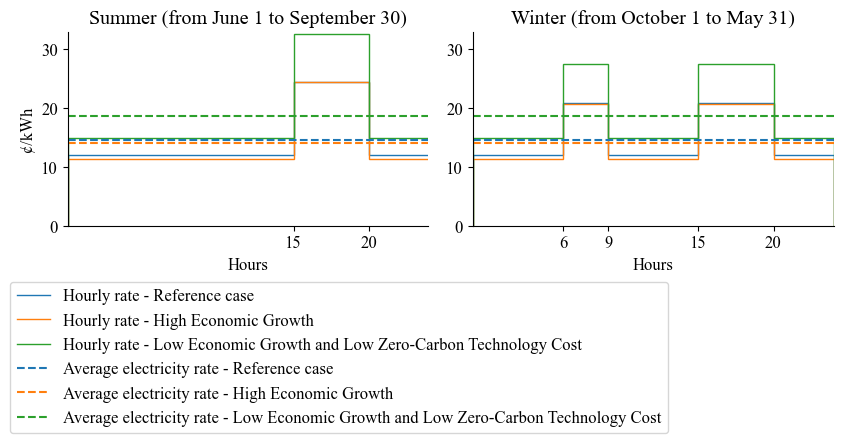

In [3]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

reference_ref = {'Low rates': 12, 'High rates summer': 24.5, 'High rates winter': 20.9}
reference_high = {'Low rates': 11.4, 'High rates summer': 24.5, 'High rates winter': 20.7}
reference_low = {'Low rates': 15, 'High rates summer': 32.6, 'High rates winter': 27.5}

df = pd.DataFrame({'time': np.linspace(0, 23, 24)})
df['summer_ref'] = df['time'].apply(lambda x: reference_ref['High rates summer'] if ((x >= 15) & (x <= 19)) else reference_ref['Low rates'])
df['winter_ref'] = df['time'].apply(lambda x: reference_ref['High rates winter'] if ((x >= 6) & (x <= 8)) | ((x >= 15) & (x <= 19)) else reference_ref['Low rates'])
df['summer_high'] = df['time'].apply(lambda x: reference_high['High rates summer'] if ((x >= 15) & (x <= 19)) else reference_high['Low rates'])
df['winter_high'] = df['time'].apply(lambda x: reference_high['High rates winter'] if ((x >= 6) & (x <= 8)) | ((x >= 15) & (x <= 19)) else reference_high['Low rates'])
df['summer_low'] = df['time'].apply(lambda x: reference_low['High rates summer'] if ((x >= 15) & (x <= 19)) else reference_low['Low rates'])
df['winter_low'] = df['time'].apply(lambda x: reference_low['High rates winter'] if ((x >= 6) & (x <= 8)) | ((x >= 15) & (x <= 19)) else reference_low['Low rates'])


x = np.linspace(0, 24, 25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 3))
ax1.stairs(df['summer_ref'], color = sns.color_palette()[0], label = 'Hourly rate - Reference case')
ax1.stairs(df['summer_high'], color = sns.color_palette()[1], label = 'Hourly rate - High Economic Growth')
ax1.stairs(df['summer_low'], color = sns.color_palette()[2], label = 'Hourly rate - Low Economic Growth and Low Zero-Carbon Technology Cost')
ax1.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color = sns.color_palette()[0], label='Average electricity rate - Reference case')
ax1.plot(x, 14.1 * np.ones(len(x)), linestyle='dashed', color = sns.color_palette()[1], label='Average electricity rate - High Economic Growth')
ax1.plot(x, 18.66 * np.ones(len(x)), linestyle='dashed', color = sns.color_palette()[2], label='Average electricity rate - Low Economic Growth and Low Zero-Carbon Technology Cost')
ax1.set_xlabel('Hours')
ax1.set_ylabel('¢/kWh')
ax1.margins(x = 0)
ax1.set_xlim(0,23.95)
ax1.set_ylim(bottom=0, top=33)
ax1.set_xticks([15, 20])
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Summer (from June 1 to September 30)')

ax2.stairs(df['winter_ref'], color = sns.color_palette()[0])
ax2.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color = sns.color_palette()[0])
ax2.stairs(df['winter_high'], color = sns.color_palette()[1])
ax2.plot(x, 14.1 * np.ones(len(x)), linestyle='dashed', color = sns.color_palette()[1])
ax2.stairs(df['winter_low'], color = sns.color_palette()[2])
ax2.plot(x, 18.66 * np.ones(len(x)), linestyle='dashed', color = sns.color_palette()[2])
ax2.set_xlabel('Hours')
ax2.margins(x = 0)
ax2.set_ylim(bottom=0, top=33)
ax2.set_xticks([6, 9, 15, 20])
ax2.spines[['right', 'top']].set_visible(False)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.set_title('Winter (from October 1 to May 31)')
fig.legend(h1+h2, l1+l2, ncols=1, loc='lower left', bbox_to_anchor=(0, -0.5))
fig.tight_layout()
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\prices_rates_variante_sensitivity.pdf', bbox_inches='tight')
plt.show()


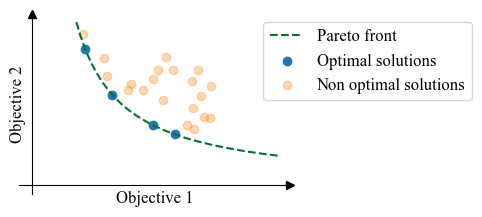

In [9]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12
x = np.linspace(1, 5.5, 50)
y = 1/ x

x_choice = np.array([1.2, 1.8, 2.7, 3.2])
y_choice = 1 / x_choice

x_random = np.random.uniform(1, 4, 20)
y_random = 1 / x_random 
for k, j in enumerate(y_random):
    y_random[k] = j + np.random.uniform(0.05, max(0.05, 0.8 - j))

plt.figure(figsize=(3.5, 3.5 * 2/3))
plt.plot(x, y, color=sns.color_palette("Greens")[5], label = 'Pareto front', linestyle='dashed')
plt.scatter(x_choice, y_choice, color=sns.color_palette()[0], label = 'Optimal solutions')
plt.scatter(x_random, y_random, color=sns.color_palette()[1], label = 'Non optimal solutions', alpha=0.3)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.plot(1, 0, '>', transform=plt.gca().get_yaxis_transform(), clip_on=False, color='k')
plt.plot(0, 1, marker="^", transform=plt.gca().get_xaxis_transform(), clip_on=False, color='k')
plt.xticks([]),plt.yticks([])
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\pareto_theory.pdf', bbox_inches='tight')
plt.show()

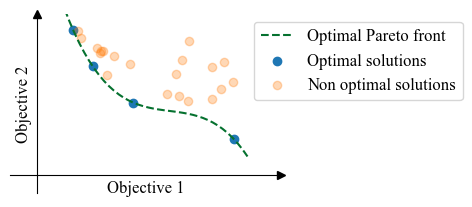

In [12]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = r'C:\drive\python\ESTCP\2_22'

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot = tot[tot['scenario'] == 'Gas']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000

coefficients = np.polyfit(tot['Annualized life-cycle cost (USD/year)'], tot['Imported energy (kWh/year)'], 3)
polynomial = np.poly1d(coefficients)
pareto = np.linspace(min(tot['Annualized life-cycle cost (USD/year)']) - 0.5, max(tot['Annualized life-cycle cost (USD/year)']) + 0.1, num=50)
y_values = polynomial(pareto)

x_random = np.random.uniform(min(tot['Annualized life-cycle cost (USD/year)']), max(tot['Annualized life-cycle cost (USD/year)']), 20)
y_random = polynomial(x_random)
for k, j in enumerate(y_random):
    y_random[k] = j + np.random.uniform(1, max(1, 37 - j))

plt.figure(figsize=(3.5 , 3.5 * 2/3))
plt.plot(pareto, y_values, color=sns.color_palette("Greens")[5], linestyle='dashed', label='Optimal Pareto front')
plt.scatter(tot['Annualized life-cycle cost (USD/year)'], tot['Imported energy (kWh/year)'], color=sns.color_palette()[0], label = 'Optimal solutions')
plt.scatter(x_random, y_random, color=sns.color_palette()[1], label = 'Non optimal solutions', alpha=0.3)
plt.xlim(min(tot['Annualized life-cycle cost (USD/year)']) * 0.9, max(tot['Annualized life-cycle cost (USD/year)']) * 1.1)  # Adding some padding for better visualization
plt.ylim(min(tot['Imported energy (kWh/year)']) * 0.9, max(tot['Imported energy (kWh/year)']) * 1.1)
plt.xlabel('Annual life-cycle cost (million $/yr)')
plt.ylabel('Imported energy (GWh/yr)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(6, 8)
plt.ylim(20, 40)
plt.gca().spines['left'].set_position(('data', 6.2))
plt.gca().spines['bottom'].set_position(('data', 22))
plt.plot(1, 22, '>', transform=plt.gca().get_yaxis_transform(), clip_on=False, color='k')
plt.plot(6.2, 1, marker="^", transform=plt.gca().get_xaxis_transform(), clip_on=False, color='k')
plt.xticks([]),plt.yticks([])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\hypotheses\pareto_theory_variante.pdf', bbox_inches='tight')
plt.show()

In [ ]:
sns.set_style('whitegrid')

folder = r'C:\drive\python\ESTCP\2_22'
files = {r'futu2-gas_multi\Solution 1-futu2-gas_multi.xlsx': 'Gas',
         r'futu2-gas_multi\Solution 4-futu2-gas_multi.xlsx': 'Gas + PV + Battery',
         r'futu2-ets_multi\Solution 1-futu2-ets_multi.xlsx': 'TEN',
         r'futu2-ets_multi\Solution 2-futu2-ets_multi.xlsx': 'TEN + PV',
         r'futu2-ets_multi\Solution 3-futu2-ets_multi.xlsx': 'TEN + PV + Battery'}
demand_folder = r'C:\git\thermal-grid-jba\PythonResources\Data\Consumption\test_sympheny'
demand_files = os.listdir(demand_folder)

plt.figure()
for f in files.keys():
    sheets = pd.ExcelFile(os.path.join(folder, f)).sheet_names
    
    modes = pd.read_excel(os.path.join(folder, f), sheet_name='Conversions')
    modes = modes[pd.notna(modes['Operational data sheet'])]
    modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    modes['ref'] = modes['Solution'] + ' - ' + modes['Hub'] + ' - ' + modes['Mode']
    modes['hub_num'] = modes['Hub'].apply(lambda x: int(x.replace('hub', '')) if x != 'plant' else 0)
    modes = modes.sort_values(['hub_num', 'Mode']).reset_index(drop=True)
    
    res = pd.DataFrame()
    for k in modes.index:
        if modes.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder, f), 
                                 sheet_name = modes.loc[k, 'Operational data sheet'],
                                 skiprows=1).drop(columns=['Time step'])
            if 'Electricity-In (kW)' in temp.columns:
                # temp = temp.rename(columns = {'Electricity-In (kW)': f"{modes.loc[k, 'hub_num']}_eleuse"})
                # res = pd.concat([res, temp[[f"{modes.loc[k, 'hub_num']}_eleuse"]]], axis = 1)
                temp = temp.rename(columns = {'Electricity-In (kW)': "eleuse"})
                res = pd.concat([res, temp[["eleuse"]]], axis = 1)
    
    for k in modes['Hub'].unique():
        if f'{k}_ele.xlsx' in demand_files:
            temp = pd.read_excel(os.path.join(demand_folder, f'{k}_ele.xlsx'), header=None)
            # temp = temp.rename(columns = {1: f"{k.replace('hub', '')}_eleuse"})
            # res = pd.concat([res, temp[[f"{k.replace('hub', '')}_eleuse"]]], axis = 1)
            temp = temp.rename(columns = {1: f"eleuse"})
            res = pd.concat([res, temp[[f"eleuse"]]], axis = 1)
    
    modes = pd.read_excel(os.path.join(folder, f), sheet_name='Imports')
    modes = modes[pd.notna(modes['Operational data sheet'])]
    modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    modes['hub_num'] = modes['Hub'].apply(lambda x: int(x.replace('hub', '')) if x != 'plant' else 0)
    modes = modes.sort_values(['hub_num', 'Name']).reset_index(drop=True)
    
    imp = pd.DataFrame()
    for k in modes.index:
        if modes.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder, f), 
                                 sheet_name = modes.loc[k, 'Operational data sheet'],
                                 skiprows=1).drop(columns=['Time step'])
            # temp = temp.rename(columns = {'Capacity (kW)': f"{modes.loc[k, 'hub_num']}_{modes.loc[k, 'Name']}import"})
            # res = pd.concat([res, temp[[f"{modes.loc[k, 'hub_num']}_{modes.loc[k, 'Name']}import"]]], axis = 1)
            temp = temp.rename(columns = {'Capacity (kW)': f"{modes.loc[k, 'Name']}import"})
            res = pd.concat([res, temp[[f"{modes.loc[k, 'Name']}import"]]], axis = 1)
    
    res = res.T.groupby(res.T.index).sum().T
    res = res[res.sum()[(res.sum() > 1000) == True].index.to_list()]
    if 'Gasimport' in res.columns:
        res['demand'] = res['Electricityimport'] + res['Gasimport']
        res['production'] = res['eleuse'] + res['Gasimport']
        res = res.drop(columns = ['Electricityimport', 'Gasimport', 'eleuse'])
    else:
        res = res.rename(columns={'Electricityimport':'demand', 'eleuse':'production'})
    res['week'] = res.index // (24*7)
    res = res.groupby(['week']).mean()
    res ['per'] = res.apply(lambda x: min(100, max(0, x['demand'] - x['production']) / x['demand'] * 100), axis=1)
    

    plt.plot(res['per'], label = files[f])
    plt.ylim((0, 100))

plt.legend()
plt.show()

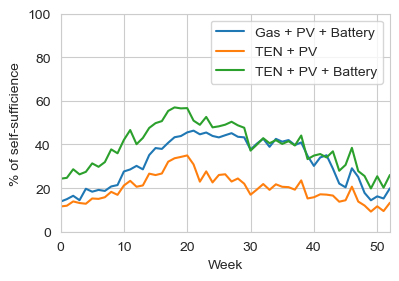

In [5]:
sns.set_style('whitegrid')

folder = r'C:\drive\python\ESTCP\2_22'
files = {r'futu2-gas_multi\Solution 1-futu2-gas_multi.xlsx': 'Gas',
         r'futu2-gas_multi\Solution 4-futu2-gas_multi.xlsx': 'Gas + PV + Battery',
         r'futu2-ets_multi\Solution 1-futu2-ets_multi.xlsx': 'TEN',
         r'futu2-ets_multi\Solution 2-futu2-ets_multi.xlsx': 'TEN + PV',
         r'futu2-ets_multi\Solution 3-futu2-ets_multi.xlsx': 'TEN + PV + Battery'}

files = {r'futu2-gas_multi\Solution 4-futu2-gas_multi.xlsx': 'Gas + PV + Battery',
         r'futu2-ets_multi\Solution 2-futu2-ets_multi.xlsx': 'TEN + PV',
         r'futu2-ets_multi\Solution 3-futu2-ets_multi.xlsx': 'TEN + PV + Battery'}

demand_folder = r'C:\git\thermal-grid-jba\PythonResources\Data\Consumption\test_sympheny'
demand_files = os.listdir(demand_folder)

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 2 / 3))
res_per = pd.DataFrame()
for f in files.keys():
    sheets = pd.ExcelFile(os.path.join(folder, f)).sheet_names
    
    modes = pd.read_excel(os.path.join(folder, f), sheet_name='Conversions')
    modes = modes[pd.notna(modes['Operational data sheet'])]
    modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    modes['ref'] = modes['Solution'] + ' - ' + modes['Hub'] + ' - ' + modes['Mode']
    modes['hub_num'] = modes['Hub'].apply(lambda x: int(x.replace('hub', '')) if x != 'plant' else 0)
    modes = modes.sort_values(['hub_num', 'Mode']).reset_index(drop=True)
    
    res = pd.DataFrame()
    for k in modes.index:
        if modes.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder, f), 
                                 sheet_name = modes.loc[k, 'Operational data sheet'],
                                 skiprows=1).drop(columns=['Time step'])
            if 'Electricity-In (kW)' in temp.columns:
                # temp = temp.rename(columns = {'Electricity-In (kW)': f"{modes.loc[k, 'hub_num']}_eleuse"})
                # res = pd.concat([res, temp[[f"{modes.loc[k, 'hub_num']}_eleuse"]]], axis = 1)
                temp = temp.rename(columns = {'Electricity-In (kW)': "eleuse"})
                res = pd.concat([res, temp[["eleuse"]]], axis = 1)
    
    for k in modes['Hub'].unique():
        if f'{k}_ele.xlsx' in demand_files:
            temp = pd.read_excel(os.path.join(demand_folder, f'{k}_ele.xlsx'), header=None)
            # temp = temp.rename(columns = {1: f"{k.replace('hub', '')}_eleuse"})
            # res = pd.concat([res, temp[[f"{k.replace('hub', '')}_eleuse"]]], axis = 1)
            temp = temp.rename(columns = {1: "eleuse"})
            res = pd.concat([res, temp[["eleuse"]]], axis = 1)
    
    modes = pd.read_excel(os.path.join(folder, f), sheet_name='Imports')
    modes = modes[pd.notna(modes['Operational data sheet'])]
    modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    modes['hub_num'] = modes['Hub'].apply(lambda x: int(x.replace('hub', '')) if x != 'plant' else 0)
    modes = modes.sort_values(['hub_num', 'Name']).reset_index(drop=True)
    
    imp = pd.DataFrame()
    for k in modes.index:
        if modes.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder, f), 
                                 sheet_name = modes.loc[k, 'Operational data sheet'],
                                 skiprows=1).drop(columns=['Time step'])
            # temp = temp.rename(columns = {'Capacity (kW)': f"{modes.loc[k, 'hub_num']}_{modes.loc[k, 'Name']}import"})
            # res = pd.concat([res, temp[[f"{modes.loc[k, 'hub_num']}_{modes.loc[k, 'Name']}import"]]], axis = 1)
            temp = temp.rename(columns = {'Capacity (kW)': f"{modes.loc[k, 'Name']}import"})
            res = pd.concat([res, temp[[f"{modes.loc[k, 'Name']}import"]]], axis = 1)
    
    res = res.T.groupby(res.T.index).sum().T
    res = res[res.sum()[(res.sum() > 1000) == True].index.to_list()]
    if 'Gasimport' in res.columns:
        res['import'] = res['Electricityimport'] + res['Gasimport']
        res['use'] = res['eleuse'] + res['Gasimport']
        res = res.drop(columns = ['Electricityimport', 'Gasimport', 'eleuse'])
    else:
        res = res.rename(columns={'Electricityimport':'import', 'eleuse':'use'})
    res['week'] = res.index // (24*7)
    res = res.groupby(['week']).mean()
    res ['per'] = res.apply(lambda x: min(100, max(0, x['use'] - x['import']) / x['use'] * 100), axis=1)
    
    plt.plot(res['per'], label = files[f])
    print(f'{files[f]} finished')
plt.ylim((0, 100))
plt.margins(x=0)
plt.xlabel('Week')
plt.ylabel('% of self-sufficience')
plt.legend()
plt.savefig(r'C:\git\JBA-site-assessment_latex\img\milp_results\self_sufficiency.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Impact of the price variation

folder_ini = r'C:\drive\python\ESTCP\2_25'
names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}
rank = {'Gas': 0, 'AW HP': 1, 'WW HP': 2, 'TEN': 3}
folders = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}
variantes = {'futu2': 'Reference case', 'higheco': 'High Economic Growth', 'worst': 'Low Economic Growth and\nLow Zero-Carbon Technology Cost'}

tot = pd.DataFrame()
for f in folders:
    file = [name for name in os.listdir(os.path.join(folder_ini, f)) if 'Summary' in name][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    res['variantes'] = f.split('-')[0]
    tot = pd.concat([tot, res])
    
tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution'] + '-' + tot['variantes']
tot['variantes'] = tot['variantes'].apply(lambda x: variantes[x])
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000
tot = tot.rename(columns = {'scenario': 'Configuration', 'variantes':'Energy scenario'})
tot['rank'] = tot['Configuration'].apply(lambda x: rank[x])
tot = tot.sort_values(['Solution', 'rank'])

price_base = 14.6
tot.loc[tot[tot['Energy scenario'] == 'Reference case'].index, 'Price'] = price_base
tot.loc[tot[tot['Energy scenario'] == 'High Economic Growth'].index, 'Price'] = 14.1
tot.loc[tot[tot['Energy scenario'] == 'Low Economic Growth and\nLow Zero-Carbon Technology Cost'].index, 'Price'] = 18.66

tot['rank_change'] = tot['rank'].shift(1) != tot['rank']
tot['rank_change'] = tot['rank_change'].astype(int)
tot['nrank'] = tot['rank_change'].cumsum()

for k in tot['nrank'].unique():
    imp = tot.loc[tot[(tot['Energy scenario'] == 'Reference case') & (tot['nrank'] == k)].index, 'Imported energy (kWh/year)'].values[0]
    lcc = tot.loc[tot[(tot['Energy scenario'] == 'Reference case') & (tot['nrank'] == k)].index, 'Annualized life-cycle cost (USD/year)'].values[0]
    tot.loc[tot[(tot['nrank'] == k)].index, 'Imported energy - Variation'] = (tot.loc[tot[(tot['nrank'] == k)].index, 'Imported energy (kWh/year)'] - imp) / imp * 100
    tot.loc[tot[(tot['nrank'] == k)].index, 'lcc - Variation'] = (tot.loc[tot[(tot['nrank'] == k)].index, 'Annualized life-cycle cost (USD/year)'] - lcc) / lcc * 100
    tot.loc[tot[(tot['nrank'] == k)].index, 'price - Variation'] = (tot.loc[tot[(tot['nrank'] == k)].index, 'Price'] - price_base) / price_base * 100

tot_vars = tot[tot['Energy scenario'] != 'Reference case']